In [1]:
from __future__ import print_function

In [2]:
import notebook
#notebook.nbextensions.check_nbextension('usability/python-markdown/', user = True)
#notebook.nbextensions.check_nbextension('usability/aspell/', user = True)
E = notebook.nbextensions.EnableNBExtensionApp()
E.enable_nbextension('usability/python-markdown/main')
E.enable_nbextension('usability/aspell/main')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#Machine Learning Engineer Nanodegree

##Project 1: Predicting Boston Housing Prices

In [4]:
from sklearn import datasets

CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

city_data = datasets.load_boston()
#print(city_data["DESCR"])

housing_prices = city_data.target
housing_features = city_data.data

feature_names = city_data.feature_names
feature_desc = ["Per Capita Crime Rate by Town",
                "Proportion of Residential Land Zoned for Lots over 25,000 sq.ft.",
                "Proportion of Non-retail Business Acres per Town",
                "Charles River Dummy Variable (= 1 if Tract Bounds River; 0 Otherwise)",
                "Nitric Oxides Concentration (Parts per 10 Million)",
                "Average Number of Rooms per Dwelling",
                "Proportion of Owner-occupied Units Built Prior to 1940",
                "Weighted Distances to Five Boston Employment Centres",
                "Index of Accessibility to Radial Highways",
                "Full-value Property-tax Rate per $10,000",
                "Pupil-teacher Ratio by Town",
                "1000(Bk - 0.63)^2 where Bk is the Proportion of Blacks by Town",
                "% Lower Status of the Population"]

###Introduction

This documents presents the results for the first project within the Machine Learning Engineer Nanodegree program. This assessment required the student to leverage machine learning techniques in order to quantify a client's house price within the Boston Area.

###Data

In [5]:
import numpy as np

total_houses = len(housing_features)
features_shape = np.shape(housing_features)
total_features = int(features_shape[1])

minimum_price = round(np.amin(housing_prices) * 1000, 2)
maximum_price = round(np.amax(housing_prices) * 1000, 2)
mean_price = round(np.mean(housing_prices) * 1000, 2)
median_price = round(np.median(housing_prices) * 1000, 2)
std_dev = round(np.std(housing_prices) * 1000, 2)

This assessment uses house price data from the StatLib library which is maintained at Carnegie Mellon University, and hosted on the <a href = "https://archive.ics.uci.edu/ml/datasets/Housing">UCI Machine Learning Repository</a>. There are {{total_houses}} houses and {{total_features}} features within the dataset. The minmum house price is {{minimum_price}}, maximum price is {{maximum_price}} and mean price is {{mean_price}}, all in dollars.

###Question 1

Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.

####Answer

Scatterplots for each feature against the House Price variable are shown below. Each scatterplot also has a fitted OLS regression line overlay.

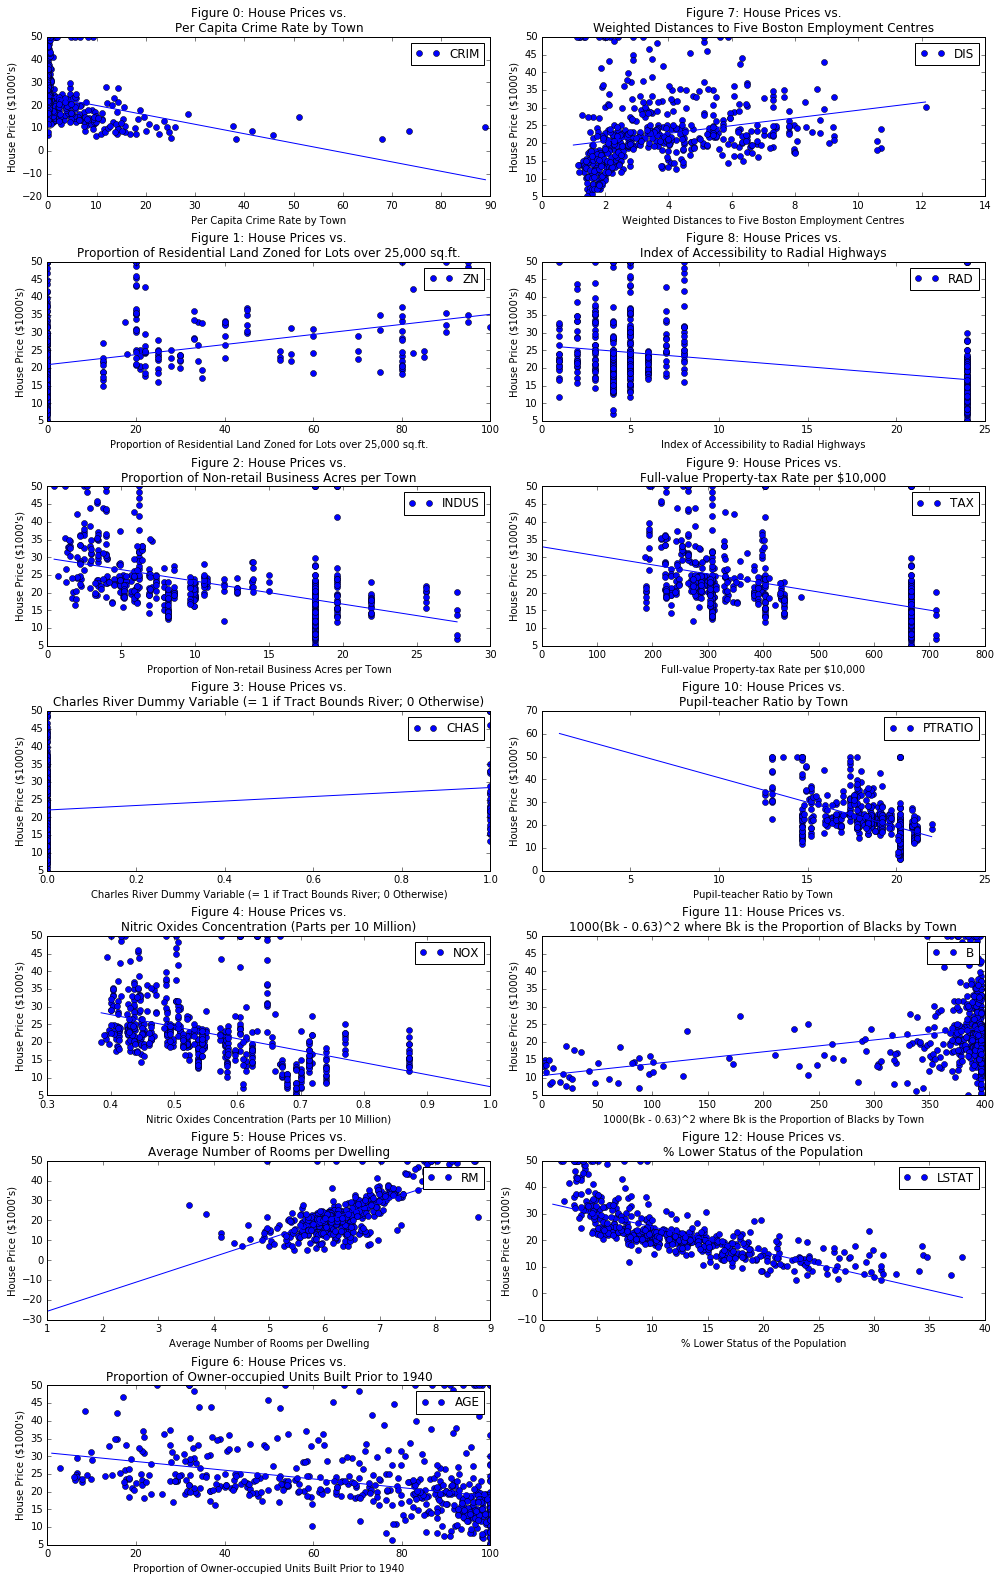

In [6]:
import statsmodels.api as sm
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plot
%matplotlib inline

fig = plot.figure(figsize = (14, 22))
gs = gridspec.GridSpec(7, 2)

for f in enumerate(feature_names):
    feat_desc = feature_desc[f[0]]
    
    if f[0] <= 6:
        ax = plot.subplot(gs[f[0], 0])
    else:
        ax = plot.subplot(gs[f[0]-7, 1])
    
    plot.tight_layout()
    plot.title("Figure " + str(f[0]) + ": House Prices vs.\n" + feat_desc)
    plot.plot(housing_features[:,f[0]], housing_prices, "bo", label = f[1])
    plot.legend()
    plot.xlabel(feat_desc)
    plot.ylabel("House Price ($1000's)")
    
    label = housing_prices
    feat = housing_features[:,f[0]]
    feat = sm.add_constant(feat)
    ols_model = sm.OLS(label, feat)
    ols_fitted = ols_model.fit()
    feat_pred = np.linspace(feat.min(), feat.max())
    feat_pred2 = sm.add_constant(feat_pred)
    label_pred = ols_fitted.predict(feat_pred2)
    
    plot.plot(feat_pred, label_pred)
    fig.add_subplot(ax)
    
plot.show()

There are no extreme outliers visible within any of the available features. However, the scatterplots do suggest that some features may have superior correlation to the House Price variable.

A summary table is shown below for each features fitted OLS regression statistics against House Prices. The table has been sorted according to descending $R^2$ measures.

In [7]:
import statsmodels.api as sm
import pandas as pd

resultcols = ["feature",
              "description", 
              "coefficient", 
              "t-stat", 
              "p-value",
              "r^2"]

results_df = pd.DataFrame([])

for f in enumerate(feature_names):
    feat_desc = feature_desc[f[0]]
    label = housing_prices
    feat = housing_features[:,f[0]]
    feat = sm.add_constant(feat)
    ols_model = sm.OLS(label, feat)
    ols_fitted = ols_model.fit()
    
    coeff = ols_fitted.params[1] #coefficient
    t_stat = ols_fitted.tvalues[0] #t-stat
    p_value = ols_fitted.pvalues[0] #p-value
    r2 = ols_fitted.rsquared #R^2
    
    temp_df = pd.DataFrame([[f[1],
                             feat_desc, 
                             coeff, 
                             t_stat, 
                             p_value, 
                             r2]], 
                           index = [f[0]], columns = resultcols)

    results_df = results_df.append(temp_df)

print("Table 1: Feature Regression Statistics Table")
results_df.sort_values(by = "r^2", ascending = False)

Table 1: Feature Regression Statistics Table


,feature,description,coefficient,t-stat,p-value,r^2
12,LSTAT,% Lower Status of the Population,-0.950049,61.415146,3.743081e-236,0.544146
5,RM,Average Number of Rooms per Dwelling,9.102109,-13.084226,6.950229e-34,0.483525
10,PTRATIO,Pupil-teacher Ratio by Town,-2.157175,20.581406,9.077444e-69,0.257847
2,INDUS,Proportion of Non-retail Business Acres per Town,-0.648490,43.536622,6.704987e-173,0.233990
9,TAX,"Full-value Property-tax Rate per $10,000",-0.025568,34.768331,5.519383e-136,0.219526
4,NOX,Nitric Oxides Concentration (Parts per 10 Mill...,-33.916055,22.827995,9.866245e-80,0.182603
0,CRIM,Per Capita Crime Rate by Town,-0.412775,58.676212,2.168010e-227,0.148866
8,RAD,Index of Accessibility to Radial Highways,-0.403095,46.963616,3.282092e-186,0.145639
6,AGE,Proportion of Owner-occupied Units Built Prior...,-0.123163,31.006388,6.814198e-119,0.142095
1,ZN,Proportion of Residential Land Zoned for Lots ...,0.142140,49.247899,9.489803e-195,0.129921


Subjectively, the coefficient polarity for each of the regressed features shown above seems reasonable. The regression fit does vary significantly for each however, with Feature 12: % Lower Status of the Population having the highest $R^2$ value, and Feature 3: Charles River Dummy Variable having the lowest $R^2$ value.

Based on an initial assessment of each feature, I would nominate a model which included Feature 5: Average Number of Rooms per Dwelling, Feature 10: Pupil-teacher Ratio by Town, and finally, Feature 12: % Lower Status of the Population.

###Question 2

Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?

####Answer

In [8]:
import pandas as pd

pd.set_option("display.max_colwidth", 100)

In [9]:
import pandas as pd

resultcols = ["feature",
              "description",
              "minValue",
              "maxValue",
              "clientValue",
              "prelimSelection"]

results_df = pd.DataFrame([])

i = 0
for f in feature_names:
    if i == 5 or i == 10 or i == 12:
        pselec = 1
    else:
        pselec = 0
    
    temp_df = pd.DataFrame([[f,
                             feature_desc[i],
                             min(housing_features[:,i]),
                             max(housing_features[:,i]),
                             CLIENT_FEATURES[0][i],
                             pselec]],
                             index = [i], columns = resultcols)

    results_df = results_df.append(temp_df)
    i += 1
    
print("Table 2: Client Feature Value Comparison Table")
results_df

Table 2: Client Feature Value Comparison Table


,feature,description,minValue,maxValue,clientValue,prelimSelection
0,CRIM,Per Capita Crime Rate by Town,0.00632,88.9762,11.950,0
1,ZN,"Proportion of Residential Land Zoned for Lots over 25,000 sq.ft.",0.00000,100.0000,0.000,0
2,INDUS,Proportion of Non-retail Business Acres per Town,0.46000,27.7400,18.100,0
3,CHAS,Charles River Dummy Variable (= 1 if Tract Bounds River; 0 Otherwise),0.00000,1.0000,0.000,0
4,NOX,Nitric Oxides Concentration (Parts per 10 Million),0.38500,0.8710,0.659,0
5,RM,Average Number of Rooms per Dwelling,3.56100,8.7800,5.609,1
6,AGE,Proportion of Owner-occupied Units Built Prior to 1940,2.90000,100.0000,90.000,0
7,DIS,Weighted Distances to Five Boston Employment Centres,1.12960,12.1265,1.385,0
8,RAD,Index of Accessibility to Radial Highways,1.00000,24.0000,24.000,0
9,TAX,"Full-value Property-tax Rate per $10,000",187.00000,711.0000,680.000,0


In [10]:
import pandas as pd

pd.reset_option("display.max_colwidth")

When referring back to the OLS regression statistics for each feature, we see that a <b>greater</b> amount of Average Number of Rooms per Dwelling, or a <b>lower</b> amount of Pupil-teacher Ratio by Town, or a <b>lower</b> amount of % Lower Status of the Population all lead to a <b>greater</b> House Price.

Based on the client's features, we can see that he or she has a Pupil-teacher Ratio by Town which is close to the maximum value within the dataset. This would suggest a lower price for the clients house. However, the clients Average Number of Rooms per Dwelling and % Lower Status of the Population lie approximately within the median of the range of the dataset.

###Question 3

Why do we split the data into training and testing subsets for our model?

####Answer

In [11]:
from sklearn import cross_validation

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.30)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)

training_subset = len(y_train)
testing_subset = len(y_test)

According to <a href = "http://scikit-learn.org/stable/modules/cross_validation.html">scikit learn</a>, learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting.

In order to avoid overfitting, analysts commonly employ techniques to split the data into training and testing subsets prior to assessing model performance. There are a number of available methods to perform such a function. A simple train-test split for example, may bear some advantage for applications which involve large scale datasets and/or where computation time is a critical factor. 

The resulting number of observations within the testing and training subsets for a 30% split are {{testing_subset}} and {{training_subset}} respectively.

###Question 4

Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

####Answer

The choice of performance metric depends on the characteristics of the underlying data, type of model employed, and focus of application. More generally, Mean Squared Error (MSE) is a good performance metric for applications where the model follows a normal distribution, however, the sensitivity of the MSE to outliers is one of the most common concerns when using this metric (<a href = "https://www.researchgate.net/publication/272024186_Root_mean_square_error_RMSE_or_mean_absolute_error_MAE-_Arguments_against_avoiding_RMSE_in_the_literature">ref</a>). In light of this, MSE has been selected as the preferred metric for this assessment, since there are little to no identified outliers and the selected model assumes errors follow a normal distribution.

In [12]:
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
    
    error = mean_squared_error(y_true, y_predict)
    return error

total_error = performance_metric(y_train, y_train)

###Question 5

What is the grid search algorithm and when is it applicable?

####Answer

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
from sklearn import datasets

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    regressor = DecisionTreeRegressor()
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
    scoring_function = make_scorer(mean_squared_error, greater_is_better = False)
    reg = GridSearchCV(regressor, param_grid = parameters,scoring = scoring_function)
    reg.fit(X, y)

    return reg

city_data = datasets.load_boston()
housing_prices = city_data.target
housing_features = city_data.data
reg = fit_model(housing_features, housing_prices)

param_range = [1,2,3,4,5,6,7,8,9,10]
min_param = min(param_range)
max_param = max(param_range)
best_param = reg.best_params_["max_depth"]

According to <a href = "http://scikit-learn.org/stable/modules/grid_search.html">scikit learn</a>, search algorithms allow model parameters to be set by searching a parameter space for the best evaluating estimator performance score. Under such approach, the analyst is able to avoid selecting a single, and potentially non-optimized set of parameters for their desired model, and instead is provided with a set of parameters which are optimized according to their desired performance metric.

There are a range of search algorithms available to the analyst for parameter selection. For this assessment, the <a href = "http://scikit-learn.org/stable/modules/cross_validation.html">GridSearchCV procedure</a> has been implemented via the scikit learn package, which implements a fit and score method, over the cross-validated datasets. In this case, the range of parameter passed to the GridSearchCV proceedure are varying depth levels for the DecisionTreeRegressor algorithm. The depth levels range from {{min_param}} to {{max_param}}.

###Question 6

What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?

####Answer

For this assessment, a <a href = "http://scikit-learn.org/stable/modules/cross_validation.html">k-fold cross-validation procedure</a> has been implemented via the scikit learn package. Under this technique, the training set is split into k smaller sets, with the model trained using k-1 of the folds and tested on the remaining part of the data. This folding process continues in order to capture insights from the entire dataset. Under each fold, the GridSearchCV proceedure also optimizes the parameters set.

Below, a set of evaluations for the DecisionTreeRegressor algorithm according to our chosen performance metric are show. Each evaluation carries an increasing 'max_depth' parameter on the full training set, and can be used to observe how model complexity affects learning and testing errors.

In [14]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    fig = plot.figure(figsize=(10,8))

    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))
    
    for k, depth in enumerate([1,3,6,10]):
        for i, s in enumerate(sizes):
            regressor = DecisionTreeRegressor(max_depth = depth)
            regressor.fit(X_train[:s], y_train[:s])
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))
        
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
        
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 18, y = 1.03)
    fig.tight_layout()
    fig.show()

In [15]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        regressor = DecisionTreeRegressor(max_depth = d)
        regressor.fit(X_train, y_train)
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    plot.figure(figsize=(7, 5))
    plot.title('Decision Tree Regressor Complexity Performance')
    plot.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    plot.plot(max_depth, train_err, lw=2, label = 'Training Error')
    plot.legend()
    plot.xlabel('Maximum Depth')
    plot.ylabel('Total Error')
    plot.show()

C:\Anaconda3\envs\python2\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\envs\python2\lib\site-packages\ipykernel\__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\envs\python2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


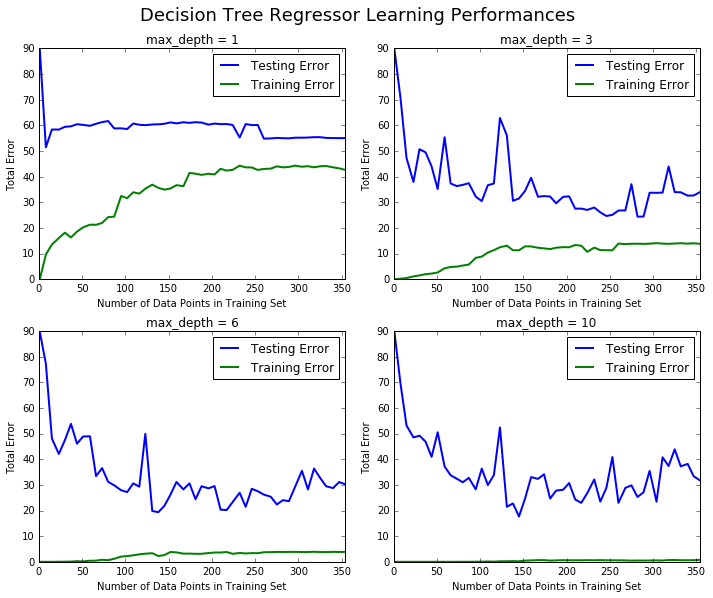

In [16]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

learning_curves(X_train, y_train, X_test, y_test)

###Question 7

Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?

####Answer

The four plots shown above vary the `max_depth` parameter of the model between 1, 3, 6 and 10. For all plots the testing error is greater than the training error, which is intuitive. In all cases, a very small amount of available datapoints in the training set leads to a large test error. As the number of datapoints increase, this error tends to fall, however there are some notable spikes in both testing error over the range.

###Question 8

Look at the learning curve graphs for the model with a max_depth of 1 and a max_depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max_depth is 1? What about when the max_depth is 10?

####Answer

With a max_depth parameter of one, the model suffers from high bias, that is, the model performs relatively poorly on both the test and training sets. On the other hand, with a max_depth parameter of 10, the model suffers from overfitting. In this case, the training error is very minimal, which suggest that the model would struggle to generalize to unseen data.

###Question 9

From the model complexity graph, describe the training and testing errors as the max_depth increases. Based on your interpretation of the graph, which max_depth results in a model that best generalizes the dataset? Why?

####Answer

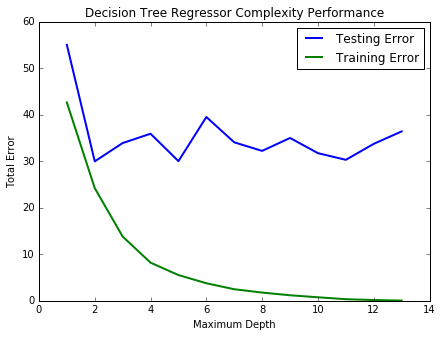

In [17]:
model_complexity(X_train, y_train, X_test, y_test)

As model complexity increases, both the training and test error improves. It is important to note that both error measures see diminishing returns from each incremental increase in model complexity, with testing error seeing a greater diminishing return effect. In fact, as model complexity increases over the range, the testing error tends to flatten out beyond a maximum depth of four. It is from this point that the model is beginning to overfit the data.

###Question 10

Using grid search on the entire dataset, what is the optimal max_depth parameter for your model? How does this result compare to your intial intuition?

####Answer

According to the results of the GridSearchCV algorithm, the optimal max_depth parameter for the selected model is {{best_param}}. Not surprisingly, this value is not too dissimilar from the suggested max_depth from the previous question. Selecting a max_depth value significantly greater or less than this value would result in performance issues as described above.

###Question 11

With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?

####Answer

In [18]:
sale_price = round(reg.predict(CLIENT_FEATURES) * 1000, 2)

According to the parameter-tuned model, the suggested selling price for the client's home is {{sale_price}} dollars, which is not too dissimilar from the mean price of {{mean_price}} dollars.

###Question 12

In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.

####Answer

I would be cautious in using such a model as the only means of infroming the client of an appropriate sales price. There are likely to be limitations due mainly to the leveraged dataset. For example, the dataset may be missing features which, if included within the model specification would add explanatory power over house prices. Not including these features would lead to a misspecified model which does not reflect the true dynamics of the house price market. Additionally, the age of the data may make it unreasonable to use, as over time, structural changes within the house price market may cause historical empirical relationships to become void.